# Reading timsdata using PASTAQ

## Install PASTAQ

In [5]:
!pip install ../dist/pastaq-0.11.4-cp311-cp311-linux_x86_64.whl

Processing /home/jovyan/work/github/PASTAQ/dist/pastaq-0.11.4-cp311-cp311-linux_x86_64.whl


## Verify that `libtimsdata.so` is installed

In [6]:
!ldd /opt/conda/lib/python3.11/site-packages/pastaq/pastaq.cpython-311-x86_64-linux-gnu.so

	linux-vdso.so.1 (0x00007ffe1e3c7000)
	libz.so.1 => /lib/x86_64-linux-gnu/libz.so.1 (0x00007f04be1f4000)
	libtimsdata.so => /opt/conda/lib/python3.11/site-packages/pastaq/linux64/libtimsdata.so (0x00007f04bd800000)
	libstdc++.so.6 => /lib/x86_64-linux-gnu/libstdc++.so.6 (0x00007f04bd400000)
	libm.so.6 => /lib/x86_64-linux-gnu/libm.so.6 (0x00007f04be10b000)
	libgcc_s.so.1 => /lib/x86_64-linux-gnu/libgcc_s.so.1 (0x00007f04be0de000)
	libc.so.6 => /lib/x86_64-linux-gnu/libc.so.6 (0x00007f04bd000000)
	/lib64/ld-linux-x86-64.so.2 (0x00007f04be219000)
	libdl.so.2 => /lib/x86_64-linux-gnu/libdl.so.2 (0x00007f04be0d3000)
	librt.so.1 => /lib/x86_64-linux-gnu/librt.so.1 (0x00007f04be0ce000)
	libpthread.so.0 => /lib/x86_64-linux-gnu/libpthread.so.0 (0x00007f04be0c9000)


## Import pastaq

In [7]:
import pastaq as pq

### Create a `tims` pastaq object

In [8]:
tims = pq.TimsData("./data/DIA/20240112_nE2_5ng_HeLa_3_AuroraElite15x75-3_23B_32min_50C_pyDIAID_DIA_Slot2-53_1_3346.d")
tims.getNumberOfFrames()

17885

### Get the `Frames` table

In [9]:
column_names, frames_table = tims.getFramesTable()

# Print column names
print("Columns:", column_names)

# Print the first few rows
print("First 5 rows:")
for row in frames_table[:5]:
    print(row)

Columns: ['Id', 'Time', 'Polarity', 'ScanMode', 'MsMsType', 'TimsId', 'MaxIntensity', 'SummedIntensities', 'NumScans', 'NumPeaks', 'MzCalibration', 'T1', 'T2', 'TimsCalibration', 'PropertyGroup', 'AccumulationTime', 'RampTime', 'Pressure']
First 5 rows:
[1, 0.738355, '+', 9, 0, 64, 980, 9247956, 918, 200830, 1, 25.4521095811568, 23.6556203453307, 1, 1, 99.953, 99.953, 2.65573033864293]
[2, 0.845381, '+', 9, 9, 481272, 276, 511532, 918, 10698, 1, 25.4521095811568, 23.6556203453307, 1, 1, 99.953, 99.953, 2.65573033864293]
[3, 0.952482, '+', 9, 9, 516209, 295, 337299, 918, 7302, 1, 25.4521095811568, 23.6556203453307, 1, 1, 99.953, 99.953, 2.65573033864293]
[4, 1.059844, '+', 9, 9, 540881, 198, 179009, 918, 4098, 1, 25.4521095811568, 23.6556203453307, 1, 1, 99.953, 99.953, 2.65573033864293]
[5, 1.168595, '+', 9, 9, 555592, 173, 183832, 918, 4268, 1, 25.4521483107424, 23.655594259479, 1, 1, 99.953, 99.953, 2.65574297827383]


In [11]:
len(frames_table)

17885

### Select frames where `MsMsTypes == 0`

In [12]:
filtered_frames = [row for row in frames_table if row[4] == 0]
len(filtered_frames)

1376

In [13]:
# Print column names
print("Columns:", column_names)

print("First 5 rows:")
for row in filtered_frames[:5]:
    print(row)

Columns: ['Id', 'Time', 'Polarity', 'ScanMode', 'MsMsType', 'TimsId', 'MaxIntensity', 'SummedIntensities', 'NumScans', 'NumPeaks', 'MzCalibration', 'T1', 'T2', 'TimsCalibration', 'PropertyGroup', 'AccumulationTime', 'RampTime', 'Pressure']
First 5 rows:
[1, 0.738355, '+', 9, 0, 64, 980, 9247956, 918, 200830, 1, 25.4521095811568, 23.6556203453307, 1, 1, 99.953, 99.953, 2.65573033864293]
[14, 2.132949, '+', 9, 0, 738851, 1070, 8914921, 918, 193356, 1, 25.4521483107424, 23.655594259479, 1, 1, 99.953, 99.953, 2.65574297827383]
[27, 3.52837, '+', 9, 0, 1469444, 1149, 9305975, 918, 202469, 1, 25.4519875988391, 23.6559977305183, 1, 1, 99.953, 99.953, 2.65576911341986]
[40, 4.92368, '+', 9, 0, 2217282, 832, 8773208, 918, 190222, 1, 25.4520275427733, 23.6559678877519, 1, 1, 99.953, 99.953, 2.65576145680363]
[53, 6.318427, '+', 9, 0, 2939169, 977, 8736413, 918, 189582, 1, 25.4518935199127, 23.655906181436, 1, 1, 99.953, 99.953, 2.65574562510849]


In [14]:
scan = tims.readScans(53,0,918)
scan.getNbrScans()

918

### Indices

In [15]:
x_axis = scan.getScanX(600)
print(x_axis)

[77452, 88593, 93396, 99315, 107317, 108947, 131501, 131808, 132137, 137301, 138567, 138582, 139106, 139552, 140988, 141304, 142131, 142193, 142477, 142499, 144241, 144511, 145713, 146334, 147231, 149491, 149780, 149861, 150765, 151594, 151623, 151884, 151911, 152972, 153851, 153901, 154451, 154471, 155872, 155931, 156154, 156189, 157046, 157625, 158731, 159314, 160107, 160960, 162355, 162668, 162892, 163446, 163742, 164572, 164600, 165094, 165150, 165656, 165668, 165688, 165933, 166220, 166484, 167337, 167611, 167834, 167893, 168179, 168410, 168423, 168935, 169292, 169511, 169538, 170340, 170574, 171373, 171383, 171404, 171667, 171922, 171948, 172216, 172762, 172775, 172994, 173005, 173301, 173545, 173849, 174066, 174882, 176519, 176749, 178064, 178847, 180160, 180174, 180181, 180956, 181474, 181751, 182030, 184841, 186922, 188175, 190750, 191988, 192480, 196525, 198018, 199219, 202743, 203986, 204731, 206096, 206557, 207006, 212052, 213562, 214998, 216401, 217697, 217803, 217933, 218

### Intensity

In [16]:
y_axis = scan.getScanY(600)
print(y_axis)

[45, 81, 72, 88, 67, 67, 43, 84, 68, 108, 51, 42, 36, 12, 54, 62, 27, 19, 13, 10, 42, 34, 28, 44, 21, 58, 23, 19, 49, 58, 10, 39, 46, 41, 52, 47, 59, 21, 43, 44, 32, 40, 9, 56, 53, 45, 20, 54, 44, 77, 9, 62, 10, 30, 27, 44, 19, 49, 39, 50, 79, 27, 50, 35, 41, 21, 24, 47, 38, 9, 41, 10, 48, 53, 11, 48, 11, 57, 41, 19, 27, 39, 71, 60, 19, 25, 87, 81, 31, 11, 76, 34, 43, 71, 52, 10, 18, 37, 49, 73, 49, 41, 43, 60, 9, 56, 45, 29, 53, 10, 50, 82, 40, 85, 28, 26, 90, 55, 19, 94, 47, 94, 48, 21, 35, 42, 74, 55, 68, 37, 73, 38, 35, 52, 81, 47, 51, 38, 44, 29, 36, 18, 65, 53, 18, 31, 47, 34, 66, 37, 38, 89, 51, 54, 77, 42, 70, 48, 21, 55, 49, 60, 52, 56, 61, 49, 45, 38, 41, 58, 49, 19, 55, 48, 28, 45, 56, 40, 103, 41, 67, 27, 24, 33, 38, 65, 32, 30, 75, 40, 65, 79, 57, 53, 38, 25, 52, 152, 10, 120, 10, 66, 85, 46, 47, 57, 49, 127, 12, 41, 23, 79, 39, 47, 36, 55, 49, 32, 68, 60, 120, 51, 48, 39, 55, 21, 42, 50, 24, 53, 48, 47, 52, 43, 41, 75, 53, 52, 47, 80, 87, 51, 19, 58, 46, 56, 54, 44, 37, 4

### `mz`

In [17]:
x_axis_masses = tims.indexToMz(53, x_axis)
print(x_axis_masses)

[259.1338722780557, 288.14413873447035, 301.1254702603004, 317.5164801315167, 340.3663046949428, 345.1181162820145, 414.2491768061814, 415.2336789309536, 416.29002876784335, 433.0463826410733, 437.20481102002236, 437.2542006090942, 438.98129436174673, 440.4539833799563, 445.2123984514738, 446.2629467324412, 449.01818418450324, 449.225085370475, 450.17343540878903, 450.24694087468026, 456.0862856200934, 456.9947179865171, 461.0498921573119, 463.1519706085899, 466.19674675478177, 473.9123165964932, 474.90352005516354, 475.1815171838229, 478.2896220994206, 481.14876990527495, 481.2489425838003, 482.15096587904424, 482.24432683573013, 485.92022236811187, 488.9761390242765, 489.15025612056763, 491.06758978853026, 491.13738167930114, 496.03864435530824, 496.2455841010937, 497.0281360095699, 497.1510140332541, 500.16450885710435, 502.20561790015796, 506.11607611065006, 508.18347939671736, 511.00233734312667, 514.0431791994135, 519.0356247207043, 520.1591074057948, 520.9638789944958, 522.95692

## Mobility

In [18]:
tims.scanNumToOneOverK0(53,[300,301,500])

[1.370239593826579, 1.3689732176902214, 1.1142263060405453]

### Read filtered frames

In [19]:
import pandas as pd
# Initialize an empty list to store the super tables for each Id
super_df = []

# Loop through each row in the frames_data DataFrame
for row in filtered_frames:
    Id = row[0]          # frame id
    Time = row[1]        # time
    NumScans = row[8]    # number of scans
    # print(Id, " ", Time, " ",NumScans,"\n")

    # Read scans for the current Id
    scans = tims.readScans(Id, 0, NumScans)

    # Initialize lists to store scan data
    scan_ids = []
    indices = []
    intensities = []
    mz = []

    for i in range(NumScans):
        x_axis = scans.getScanX(i)
        indices.extend(x_axis)
        intensities.extend(scans.getScanY(i))
        mz.extend(tims.indexToMz(Id, x_axis))
    
    # Create a DataFrame for the scan data
    scan_df = pd.DataFrame({
        'index': indices,
        'intensity': intensities,
        'mz': mz
    })

    # Add the Id and Time columns to the scan DataFrame
    scan_df['Id'] = Id
    scan_df['Time'] = Time

    # Append the scan DataFrame to the list of super tables
    super_df.append(scan_df)

# Concatenate the super tables into a single DataFrame
super_df = pd.concat(super_df, ignore_index=True)

# Reorder the columns to have Id, Time, scanid, index, and intensity
super_df = super_df[['Id', 'Time', 'index', 'intensity', 'mz']]

In [20]:
super_df.shape

(447937413, 5)

In [21]:
super_df.head()

,Id,Time,index,intensity,mz
0,1,0.738355,115363,9,364.142183
1,1,0.738355,344870,61,1380.291096
2,1,0.738355,311932,23,1194.323302
3,1,0.738355,11388,54,118.726091
4,1,0.738355,108612,59,344.138826


In [22]:
super_df.tail()

,Id,Time,index,intensity,mz
447937408,17876,1918.869554,18995,9,132.136903
447937409,17876,1918.869554,158224,46,504.321629
447937410,17876,1918.869554,88944,78,289.083133
447937411,17876,1918.869554,290073,9,1078.332261
447937412,17876,1918.869554,329033,9,1289.196785


In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

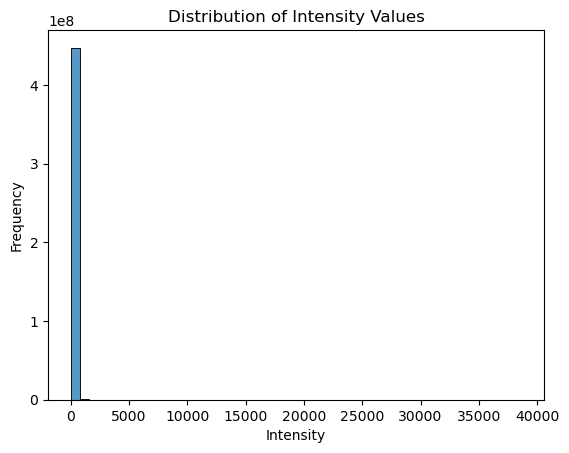

In [24]:
# Plot histogram
sns.histplot(super_df['intensity'], bins=50, kde=False)  
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.title("Distribution of Intensity Values")
plt.show()

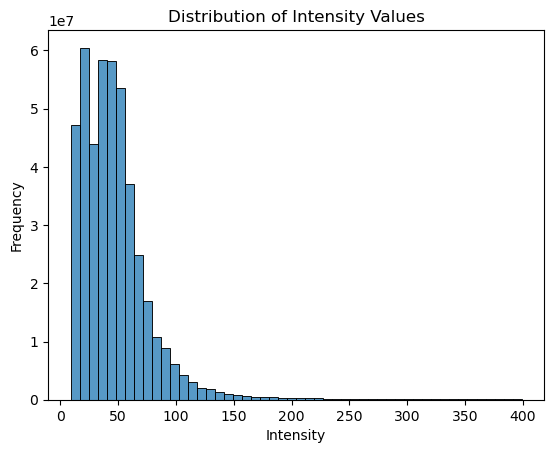

In [25]:
# Plot histogram
sns.histplot(super_df[super_df['intensity']< 400]['intensity'], bins=50, kde=False)  
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.title("Distribution of Intensity Values")
plt.show()

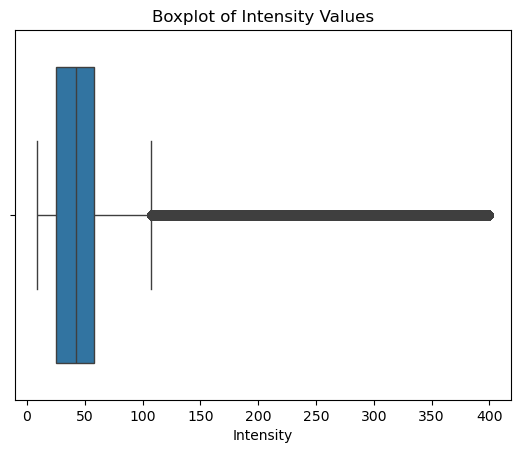

In [22]:
sns.boxplot(x=super_df[super_df['intensity']< 400]['intensity'])
plt.xlabel("Intensity")
plt.title("Boxplot of Intensity Values")
plt.show()

/tmp/ipykernel_363/1704588864.py:11: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = super_df.pivot_table(index=pd.cut(filtered_df['mz'], bins=mz_bins),


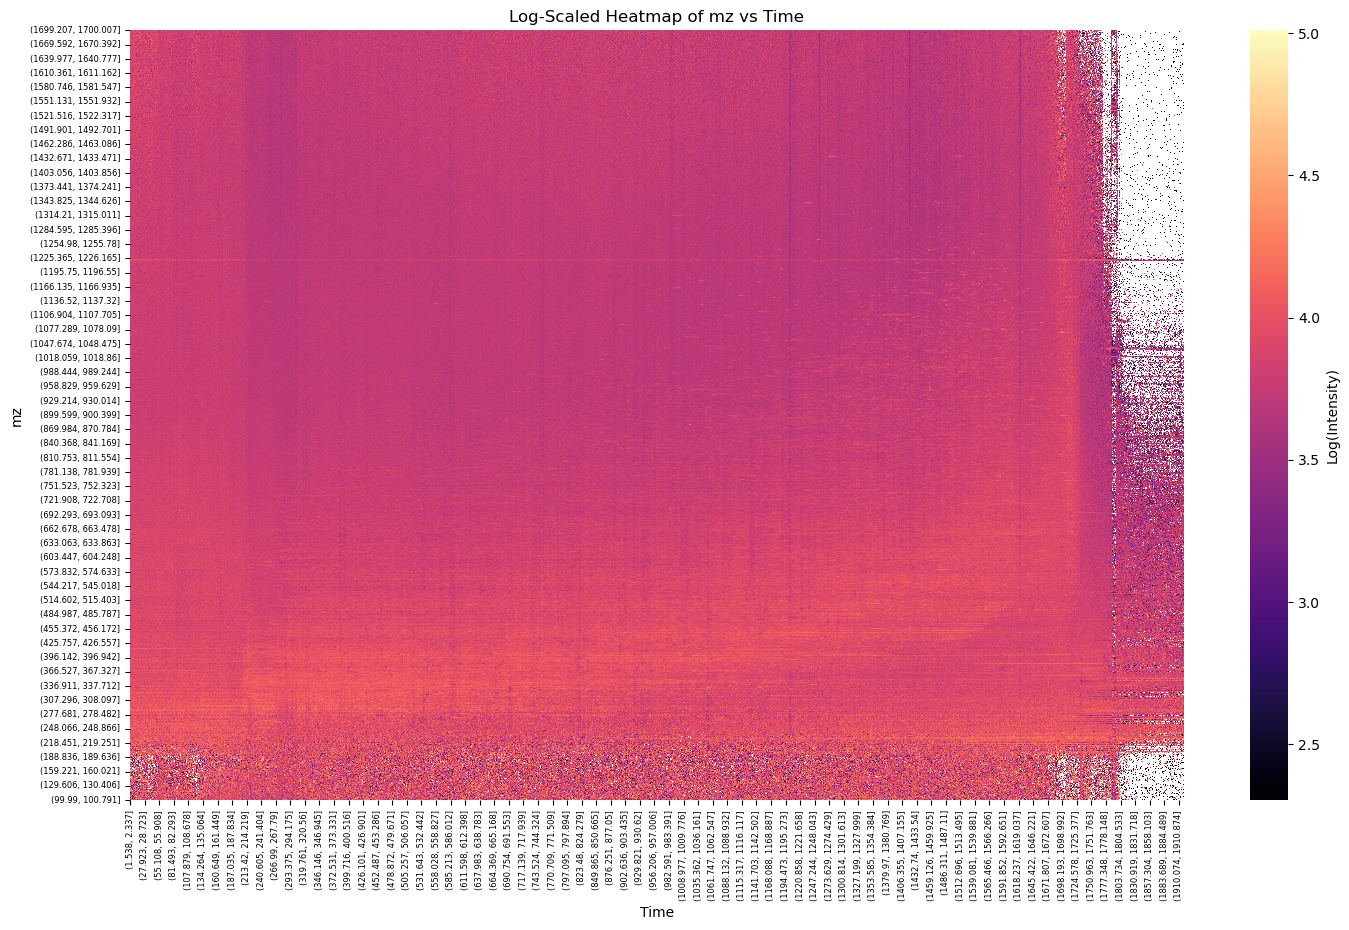

In [23]:
# Step 1: Downsample or aggregate the data if necessary to avoid memory issues

# Bin the data into smaller groups for easier plotting

filtered_df = super_df[super_df['intensity'] <150]

mz_bins = np.linspace(filtered_df['mz'].min(), filtered_df['mz'].max(), 2000)  # Adjust bin size as needed
time_bins = np.linspace(filtered_df['Time'].min(), filtered_df['Time'].max(), 2400)  # Adjust bin size as needed

# Step 2: Create a pivot table (heatmap structure) by aggregating intensity
heatmap_data = super_df.pivot_table(index=pd.cut(filtered_df['mz'], bins=mz_bins), 
                              columns=pd.cut(filtered_df['Time'], bins=time_bins), 
                              values='intensity', 
                              aggfunc='mean')  # You can change 'mean' to 'sum' if appropriate

# Step 3: Apply a logarithmic transformation to highlight minority values
# Adding 1 to avoid log(0) issues
heatmap_data_log = np.log1p(heatmap_data)

custom_cmap = LinearSegmentedColormap.from_list("custom_magma", ['#ffffcc',
'#ffeda0',
'#fed976',
'#feb24c',
'#fd8d3c',
'#fc4e2a',
'#e31a1c',
'#bd0026',
'#800026'], N=256)

# Step 4: Plot the heatmap
plt.figure(figsize=(17, 10))  # Adjust figure size as needed
sns.heatmap(heatmap_data_log, cmap='magma', norm=None,cbar_kws={'label': 'Log(Intensity)'})  # 'magma' gives more emphasis on high values

# Step 5: Customize tick label size and remove axis labels if needed
plt.tick_params(axis='x', labelsize=6)  # Decrease x-axis tick label size
plt.tick_params(axis='y', labelsize=6)  # Decrease y-axis tick label size

plt.gca().invert_yaxis()

# Step 6: Labeling the axes
plt.xlabel('Time')
plt.ylabel('mz')
plt.title('Log-Scaled Heatmap of mz vs Time')

# Step 7: Save the figure as a high-quality PNG with 300 DPI
plt.savefig('mz_vs_time_vs_intensity_heatmap.png', dpi=300, bbox_inches='tight')

# Step 6: Show the plot
plt.show()

## TODO: Implement a function to `read mz`, `ion mobility`, `time retention` ranges